**About Dataset**

This is the Car sales data set which include information about different cars . This data set is being taken from the Analytixlabs for the purpose of prediction
In this we have to see two things:
- First we have see which feature has more impact on car sales and carry out result of this
- Secondly we have to train the classifier and to predict car sales and check the accuracy of the predict

In [31]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import missingno as msno


from sklearn.preprocessing import LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [62]:
pd.set_option('display.max_columns', 100)
#Load the data with pandas read_csv method
df = pd.read_csv('Car_sales.csv')

In [63]:
#Looking at top 5 row of the data for first impression
df.head()

'''
Latest_Launch column data type is object and its format: mm/dd/yyyy. I will convert it to datetime and extract year.
'''

'\nLatest_Launch column data type is object and its format: mm/dd/yyyy. I will convert it to datetime and extract year.\n'

In [64]:
#Information about data
df.info()

'''
There are total 157 rows and 16 columns.
12 columns data types are numeric (float64) and 4 columns data types are object (text).
11 from 16 columns have missing values (__year_resale_value has 36 missing values rest of the columns have 1 or 2 missing values. I will fill missing values which in __year_resale_value and drop rest of the missing values).

Columns' names contain uppercase characters. And one column starts with underscore (__year_resale_value). Columns' names must be changed to lower case characters and cannot be starts with underscore or any symbol.

Target feature: Sales_in_thousands
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

"\nThere are total 157 rows and 16 columns.\n12 columns data types are numeric (float64) and 4 columns data types are object (text).\n11 from 16 columns have missing values (__year_resale_value has 36 missing values rest of the columns have 1 or 2 missing values. I will fill missing values which in __year_resale_value and drop rest of the missing values).\n\nColumns' names contain uppercase characters. And one column starts with underscore (__year_resale_value). Columns' names must be changed to lower case characters and cannot be starts with underscore or any symbol.\n\nTarget feature: Sales_in_thousands\n"

In [65]:
#Changing columns' names
def change_col_nam(dataframe, special_column, sc_convert_to):
    dataframe.columns = [col.lower() if col != special_column else sc_convert_to for col in dataframe.columns]

    return dataframe

df = change_col_nam(df, '__year_resale_value', 'year_resale_value')

In [66]:
df.columns

Index(['manufacturer', 'model', 'sales_in_thousands', 'year_resale_value',
       'vehicle_type', 'price_in_thousands', 'engine_size', 'horsepower',
       'wheelbase', 'width', 'length', 'curb_weight', 'fuel_capacity',
       'fuel_efficiency', 'latest_launch', 'power_perf_factor'],
      dtype='object')

In [67]:
#Descriptive statistic for numeric and object features.
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [68]:
df.describe(include='object').T

,count,unique,top,freq
manufacturer,157,30,Dodge,11
model,157,156,Neon,2
vehicle_type,157,2,Passenger,116
latest_launch,157,130,10/5/2012,2


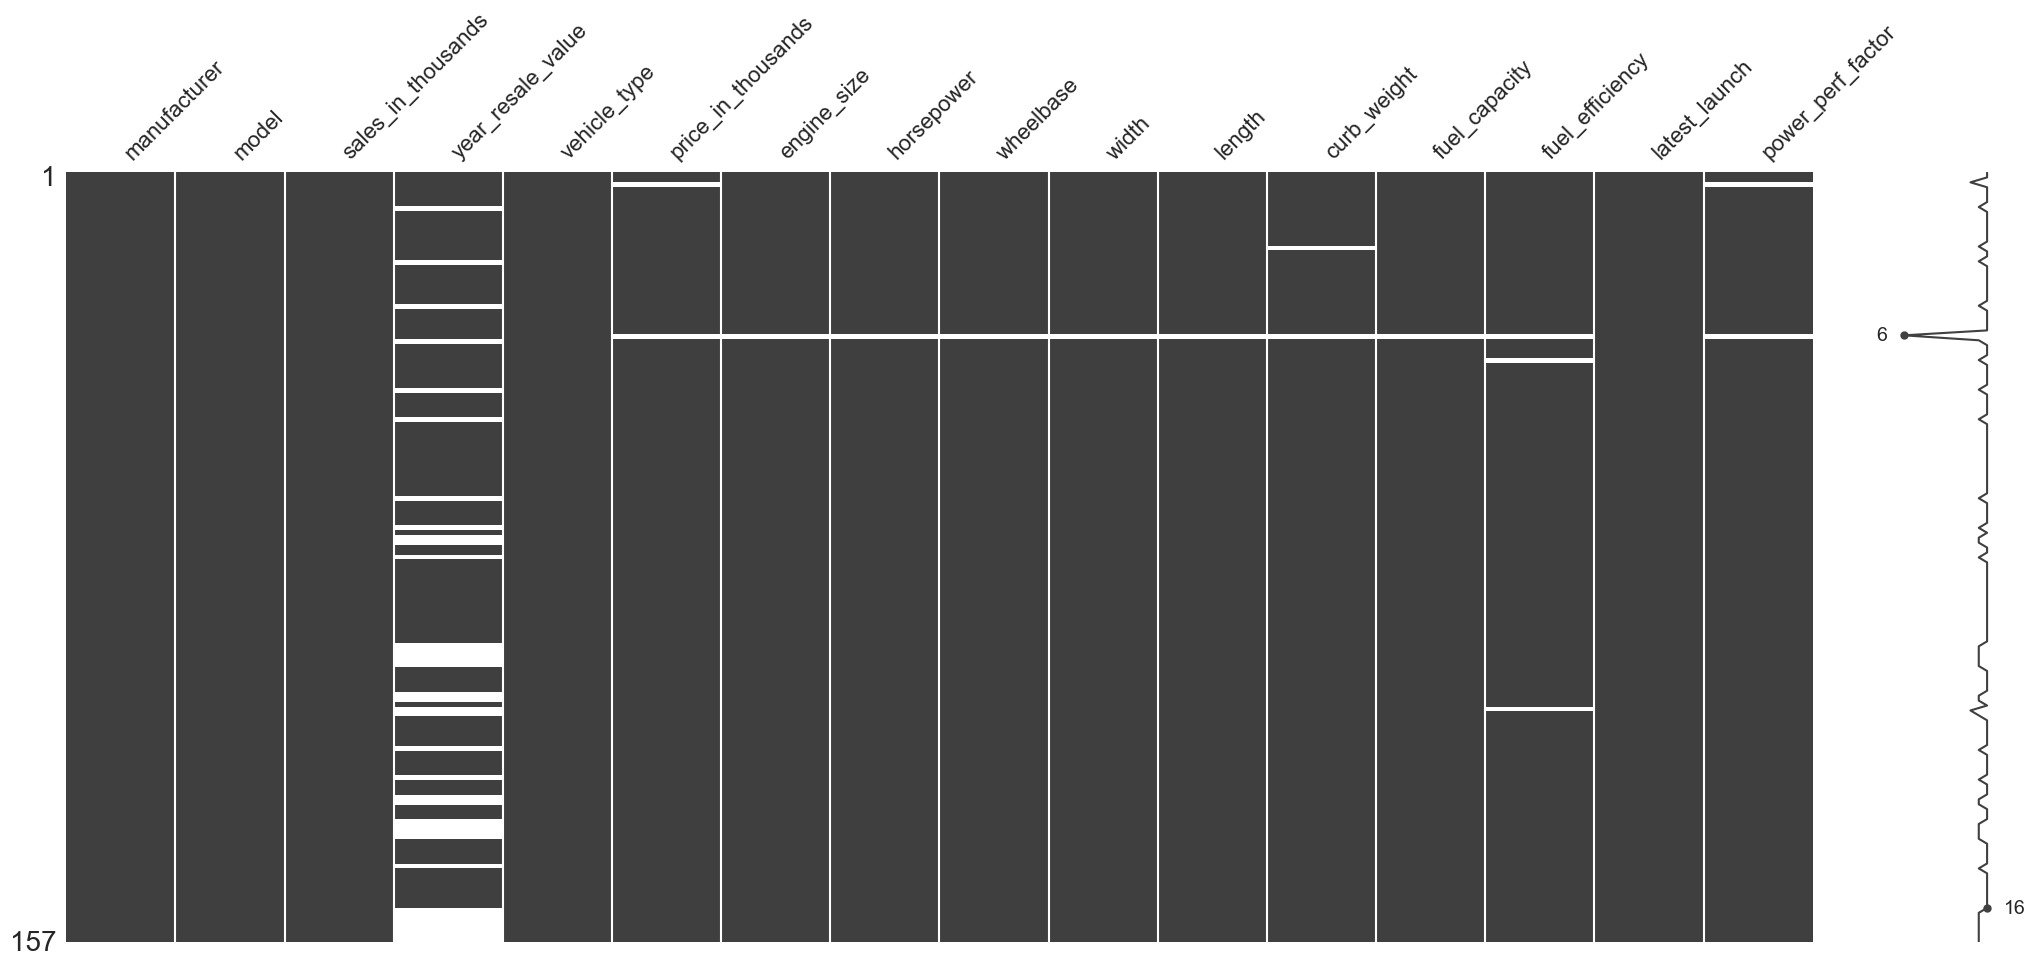

In [69]:
#Handling missing values.

# 1. Check missing values with missingno library
msno.matrix(df);
plt.show()

#There is no correlation between missing values

In [70]:
# 2. Filling missing values in year_resale_value feature and drop rest.

sales_category = pd.qcut(df['sales_in_thousands'], [0.0, 0.25, 0.5, 0.75, 1], labels=["0", "1", "2", "3"])
df['sales_category_trash'] = sales_category

df.loc[df['sales_category_trash'] == '0', 'year_resale_value'] = df.loc[df['sales_category_trash'] == '0', 'year_resale_value'].fillna(df.groupby('sales_category_trash')['year_resale_value'].mean()[0])
df.loc[df['sales_category_trash'] == '1', 'year_resale_value'] = df.loc[df['sales_category_trash'] == '1', 'year_resale_value'].fillna(df.groupby('sales_category_trash')['year_resale_value'].mean()[1])
df.loc[df['sales_category_trash'] == '2', 'year_resale_value'] = df.loc[df['sales_category_trash'] == '2', 'year_resale_value'].fillna(df.groupby('sales_category_trash')['year_resale_value'].mean()[2])
df.loc[df['sales_category_trash'] == '3', 'year_resale_value'] = df.loc[df['sales_category_trash'] == '3', 'year_resale_value'].fillna(df.groupby('sales_category_trash')['year_resale_value'].mean()[3])

df.dropna(inplace=True)

df.drop(['sales_category_trash'], axis=1, inplace=True)

In [71]:
#Checking missing values
df.isna().sum()

manufacturer          0
model                 0
sales_in_thousands    0
year_resale_value     0
vehicle_type          0
price_in_thousands    0
engine_size           0
horsepower            0
wheelbase             0
width                 0
length                0
curb_weight           0
fuel_capacity         0
fuel_efficiency       0
latest_launch         0
power_perf_factor     0
dtype: int64

In [72]:
#Convert latest_launch to year.
launch_year = []
for date in df['latest_launch']:
    launch_year.append(int(date[-4:]))

df['latest_launch'] = launch_year

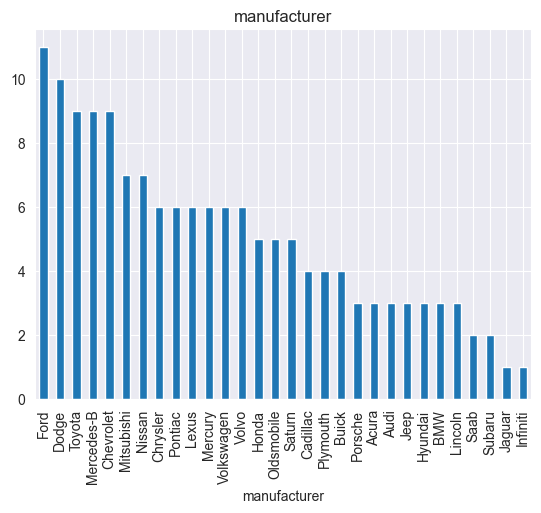

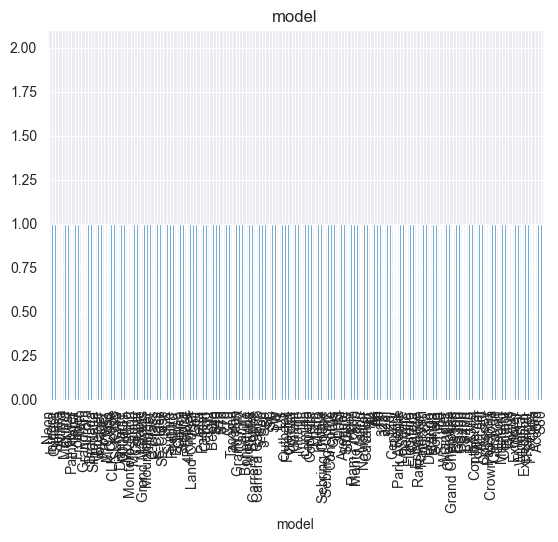

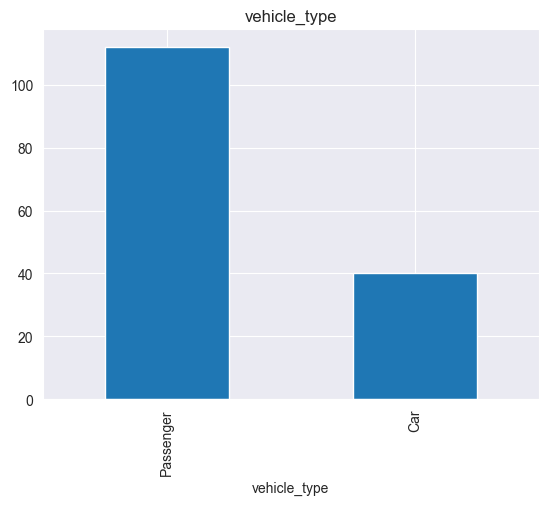

In [73]:
def visualize_object(dataset):
    for column in dataset.columns:
        if dataset[column].dtype == 'O':
            dataset[column].value_counts().plot(kind='bar')
            plt.title(column)
            plt.show(block=True)

visualize_object(df)

#I will encode vehicle_type feature with LabelEncoder. For Model and manufacturer features I will use OneHotEncoder.

In [76]:
#Encoding
def encoding(dataframe):
    le = LabelEncoder()

    columns_en = []
    for column in dataframe.columns:
        if dataframe[column].dtype == 'O':
            columns_en.append(column)

    for column in columns_en:
        if len(dataframe[column].unique()) < 3:
            dataframe[column] = le.fit_transform(dataframe[column])


    dataframe = pd.get_dummies(dataframe, drop_first=True, dtype=int)
    return dataframe

df = encoding(df)

In [77]:
df.dtypes

sales_in_thousands    float64
year_resale_value     float64
vehicle_type            int32
price_in_thousands    float64
engine_size           float64
                       ...   
model_Viper             int32
model_Voyager           int32
model_Windstar          int32
model_Wrangler          int32
model_Xterra            int32
Length: 193, dtype: object

In [79]:
X = df.drop(['sales_in_thousands'], axis=1)
y = df[['sales_in_thousands']]

In [80]:
#Standardization with RobustScaler.

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
def make_evaluate_models(xtrain, xtest, ytrain, ytest, *algorithm):
    models = {}
    for alg in algorithm:
        model = alg.fit(xtrain, ytrain)
        y_pred = model.predict(xtest)

        mse = mean_squared_error(ytest, y_pred)
        rmse = np.sqrt(mse)
        r2 = model.score(xtest, ytest)

        models[f'{model}'] = {"MSE":mse, "RMSE":rmse, "R2-score":r2}

    return models

models = make_evaluate_models(X_train, X_test, y_train, y_test, Ridge(), Lasso(), SVR(), DecisionTreeRegressor(), GradientBoostingRegressor())

print(models)

{'Ridge()': {'MSE': 1804.7031900902932, 'RMSE': 42.481798338703754, 'R2-score': 0.3032404334579073}, 'Lasso()': {'MSE': 2376.980699985872, 'RMSE': 48.754289041948624, 'R2-score': 0.08229560888723542}, 'SVR()': {'MSE': 2745.8158206522758, 'RMSE': 52.40053263710471, 'R2-score': -0.06010420522744253}, 'DecisionTreeRegressor()': {'MSE': 2818.1047008709684, 'RMSE': 53.08582391628643, 'R2-score': -0.08801348644529705}, 'GradientBoostingRegressor()': {'MSE': 1714.3321263550538, 'RMSE': 41.40449403573305, 'R2-score': 0.3381308816722548}}


C:\Users\maham\Desktop\RealWorld-Projects\CarSales\venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maham\Desktop\RealWorld-Projects\CarSales\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingRegressor()

params = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

cv_results = GridSearchCV(gbm, params, n_jobs=-1, cv=5, verbose=2, scoring='neg_mean_squared_error')

In [88]:
cv_results.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\maham\Desktop\RealWorld-Projects\CarSales\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
best_params = cv_results.best_params_
best_estimator = cv_results.best_estimator_

In [90]:
y_pred = best_estimator.predict(X_test)

In [91]:
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error with Best Estimator: {mse:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error with Best Estimator: 1570.8711


In [92]:
best_estimator.score(X_test, y_test)

0.39351829308446673